## Load test data

In [ ]:
# Here we import libraries and load data files (train and dev csv data files)

# read data
import pandas as pd

train_data = pd.read_csv('cw2_train.csv')
train_data

,Unnamed: 0,Sent1,Sent2,SimScore
0,0,"U.S., EU Widen Sanctions On Russia","U.S., EU Boost Sanctions On Russia",1.00
1,1,The lawyers advised the judges .,The lawyers advised the judges behind the acto...,0.79
2,2,Man kills 4 in Calif. before police shoot him ...,Police: Gunman killed 6 in California shootings,0.40
3,3,Someone is playing a piano.,A man is playing a guitar.,0.24
4,4,In an E-mail statement to the Knoxville News S...,I am not giving any consideration to resignati...,0.80
...,...,...,...,...
11493,11493,A man is playing piano.,A man is laying on the ground.,0.15
11494,11494,"The doctors resigned , or the secretaries supp...",The doctors resigned .,0.50
11495,11495,The artist contacted the banker .,The banker contacted the artist by the student .,0.29
11496,11496,"While the professors arrived , the student wai...",The professors arrived .,0.61


In [ ]:
dev_data = pd.read_csv('cw2_dev.csv')
dev_data

,Unnamed: 0,Sent1,Sent2,SimScore
0,0,A man with a hard hat is dancing.,A man wearing a hard hat is dancing.,1.00
1,1,A young child is riding a horse.,A child is riding a horse.,0.95
2,2,A man is feeding a mouse to a snake.,The man is feeding a mouse to the snake.,1.00
3,3,A woman is playing the guitar.,A man is playing guitar.,0.48
4,4,A woman is playing the flute.,A man is playing a flute.,0.55
...,...,...,...,...
2995,2995,"The professor introduced the artists , and the...",The professor introduced the artists .,0.62
2996,2996,The doctors supported the judges .,The doctors supported the tourists and the jud...,0.68
2997,2997,The secretary knew the manager .,The secretary knew the manager danced .,0.37
2998,2998,The professors next to the president recommend...,The president recommended the professors .,0.29


## Load Embeddings
We have used the Glove embeddings for our implementation (glove.6B.200d.txt and glove.6B.100d.txt for mlp and cnn respectively to be precise). The Glove embedding was loaded from the following link: “http://nlp.stanford.edu/data/glove.6B.zip”.

In [ ]:
## Loading glove embeddings from the link provided

!wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-06-22 12:50:32--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-06-22 12:50:32--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-06-22 12:50:32--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
# Unzipping the file loaded in zip format

!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
import numpy as np

In [ ]:
'''
A function loadGloveModel is developed to load the word vectors 
from the glove embedding. Then we created the word vectors from 
the given pair of sentences (sentence-1 and sentence-2). 
'''

def loadGloveModel(File):
    print("Loading Glove Model")
    f = open(File,'r')
    gloveModel = {}
    for line in f:
        splitLines = line.split()
        word = splitLines[0]
        wordEmbedding = np.array([float(value) for value in splitLines[1:]])
        gloveModel[word] = wordEmbedding
    print(len(gloveModel)," words loaded!")
    return gloveModel

In [ ]:
word_vectors = loadGloveModel('glove.6B.200d.txt')

Loading Glove Model
400000  words loaded!


In [ ]:
## word_vec_dim was explained in the chat and
## oov_vec is used to handle the words which is not present
## in the embedding

word_vec_dim = 200
oov_vec = np.random.rand(word_vec_dim)

In [ ]:
## creates word vectors from given sentence

## creates word vectors from given sentence
'''
Example: sentence = I am a student. This sentence turns into array of vectors
I = 200 dimension vector = [0.1,0.2,0.15,...]
am = 200 dimension vector = [0.8,0.3,0.11,...]
a = 200 dimension vector = [0.6,0.6,0.55,...]
student = 200 dimension vector = [0.81,0.33,0.71,...]
vecs = array of word vectors = [[0.1,0.2,0.15,...], [0.8,0.3,0.11,...], [0.6,0.6,0.55,...], [0.81,0.33,0.71,...]]
'''

def get_sent_word_vecs(word_vectors, sent_words):
    vecs = []
    for ww in sent_words:
        if ww in word_vectors:
            vecs.append(word_vectors[ww])
        else:
            vecs.append(oov_vec)
    return np.array(vecs)

## Provide Your Model
You should provide the implementaiton of your encoder model below.

In [ ]:
# define the MLP model
import torch
import torch.nn as nn


'''
This is the MLP model (three different models were developed)

A. MLP with 2 hidden layers where number of hidden neurons used are 200x300
and 300x200 (here 200 denotes the word embedding size)

B. Here we increased the number of the hidden neurons (2 hidden layers) where
number of hidden neurons used are 200x1024 and 1024x200 (here 200 denotes the
word embedding size) to see the effect of increasing number of hidden neurons. 

C. Finally we increased the number of hidden layers (from 2 to 3) and the number of
hidden neurons used are 200x300, 300x250 and 250x200 (here 200 denotes the
word embedding size)

That is why these different parameters were used in the model
embd_dim, id (id=1 or 2 or 3 based on the model)
'''



class MLP(nn.Module):
    def __init__(self, embd_dim, id = 1):
        super(MLP, self).__init__()
        self.relu = nn.ReLU()
        if id==1:
            self.layers = nn.Sequential(
              nn.Linear(embd_dim, 300),
              nn.ReLU(),
              nn.Linear(300, embd_dim),
              nn.ReLU()
            )
        elif id==2:
            self.layers = nn.Sequential(
              nn.Linear(embd_dim, 1024),
              nn.ReLU(),
              nn.Linear(1024, embd_dim),
              nn.ReLU()
            )
        else:
            self.layers = nn.Sequential(
              nn.Linear(embd_dim, 300),
              nn.ReLU(),
              nn.Linear(300, 250),
              nn.ReLU(),
              nn.Linear(250, embd_dim),
              nn.ReLU(),
            )
        
    def forward(self, sent1_vecs, sent2_vecs):
        avg_embd1 = torch.mean(torch.FloatTensor(sent1_vecs), dim=0).unsqueeze(0)
        avg_embd2 = torch.mean(torch.FloatTensor(sent2_vecs), dim=0).unsqueeze(0)
        sent1_repr = self.layers(avg_embd1)
        sent2_repr = self.layers(avg_embd2)
        
        return sent1_repr, sent2_repr

In [ ]:
from tqdm.notebook import tqdm

'''
This entire thing is for training the model (will describe in short)
1. Converting sentences to array of word vectors
Remember example vecs = array of word vectors = [[0.1,0.2,0.15,...], [0.8,0.3,0.11,...], [0.6,0.6,0.55,...], [0.81,0.33,0.71,...]]

2. Then we compute the forward pass of the model, compute the loss value that we wish to optimize and
backpropagate the loss (basically training the sentences)

3. Lastly for each epoch we predict the cosine similarity between sentences and find the 
error value (MSE score) which later we will use for plotting the MSE score vs number of epochs
'''

def train_model(train_data, n_epochs, lr, optimizer, loss_fnc, model):
    cos_sim = nn.CosineSimilarity()
    for epoch_i in tqdm(range(n_epochs)):
        ep_loss = []
        cnt = 0
        for i, entry in tqdm(train_data.sample(frac=1).iterrows()):
            cnt += 1
            sent1 = entry['Sent1']
            sent2 = entry['Sent2']
            sent1_embds = get_sent_word_vecs(word_vectors, sent1.split())
            sent2_embds = get_sent_word_vecs(word_vectors, sent2.split())

            # Step 1: Clear the gradients 
            optimizer.zero_grad()

            # Step 2: Compute the forward pass of the model
            sent1_repr, sent2_repr = model(sent1_embds, sent2_embds)
            pred_sim = cos_sim(sent1_repr, sent2_repr)
            true_sim = torch.FloatTensor([entry['SimScore']])

            # Step 3: Compute the loss value that we wish to optimize
            loss = loss_fnc(pred_sim, true_sim)
            ep_loss.append(loss.detach())

            # Step 4: Propagate the loss signal backward
            loss.backward()

            # Step 5: Trigger the optimizer to perform one update
            optimizer.step()

            if  cnt%1000 == 0:
                print('epoch {}, avg loss until step {}: {}'.format(epoch_i, cnt, np.mean(ep_loss)))

        print('\n======epoch {} loss======'.format(epoch_i),np.mean(ep_loss))

## Model-1

In [ ]:
'''
This is our model-1 with loss function, number of epochs, optimizer and learning rate and
other hyper-parameters defined
Similarly we will define 2 more models and train them
'''

model = MLP(word_vec_dim)
loss_fnc = nn.MSELoss()

# hyper parameters
n_epochs = 6
lr = 1e-3

# init optimizer and scheduler (lr adjustor)
import torch.optim as optim
optimizer = optim.Adam(params=model.parameters(), lr=lr) 

train_model(train_data, n_epochs, lr, optimizer, loss_fnc, model)

epoch 0, avg loss until step 1000: 0.16500423848628998
epoch 0, avg loss until step 2000: 0.15366186201572418
epoch 0, avg loss until step 3000: 0.14853720366954803
epoch 0, avg loss until step 4000: 0.1421283632516861
epoch 0, avg loss until step 5000: 0.1371718794107437
epoch 0, avg loss until step 6000: 0.13273268938064575
epoch 0, avg loss until step 7000: 0.13046377897262573
epoch 0, avg loss until step 8000: 0.1273770034313202
epoch 0, avg loss until step 9000: 0.1258719563484192
epoch 0, avg loss until step 10000: 0.12368208169937134
epoch 0, avg loss until step 11000: 0.12176921963691711


======epoch 0 loss====== 0.12093916


epoch 1, avg loss until step 1000: 0.09440165013074875
epoch 1, avg loss until step 2000: 0.09193430840969086
epoch 1, avg loss until step 3000: 0.09293317794799805
epoch 1, avg loss until step 4000: 0.0949893668293953
epoch 1, avg loss until step 5000: 0.09591090679168701
epoch 1, avg loss until step 6000: 0.09519307315349579
epoch 1, avg loss until step 7000: 0.0953235998749733
epoch 1, avg loss until step 8000: 0.09436947107315063
epoch 1, avg loss until step 9000: 0.09353619068861008
epoch 1, avg loss until step 10000: 0.09361280500888824
epoch 1, avg loss until step 11000: 0.09307505935430527


======epoch 1 loss====== 0.093216024


epoch 2, avg loss until step 1000: 0.07872625440359116
epoch 2, avg loss until step 2000: 0.08430125564336777
epoch 2, avg loss until step 3000: 0.08431095629930496
epoch 2, avg loss until step 4000: 0.08320336043834686
epoch 2, avg loss until step 5000: 0.08281051367521286
epoch 2, avg loss until step 6000: 0.08377045392990112
epoch 2, avg loss until step 7000: 0.08425769209861755
epoch 2, avg loss until step 8000: 0.08462437242269516
epoch 2, avg loss until step 9000: 0.0846933126449585
epoch 2, avg loss until step 10000: 0.08468999713659286
epoch 2, avg loss until step 11000: 0.0849430188536644


======epoch 2 loss====== 0.08474523


epoch 3, avg loss until step 1000: 0.07466887682676315
epoch 3, avg loss until step 2000: 0.07971058785915375
epoch 3, avg loss until step 3000: 0.0786152258515358
epoch 3, avg loss until step 4000: 0.07815887778997421
epoch 3, avg loss until step 5000: 0.07816316932439804
epoch 3, avg loss until step 6000: 0.07848590612411499
epoch 3, avg loss until step 7000: 0.07915337383747101
epoch 3, avg loss until step 8000: 0.0797603651881218
epoch 3, avg loss until step 9000: 0.07982412725687027
epoch 3, avg loss until step 10000: 0.07986631989479065
epoch 3, avg loss until step 11000: 0.07929539680480957


======epoch 3 loss====== 0.078997724


epoch 4, avg loss until step 1000: 0.07160491496324539
epoch 4, avg loss until step 2000: 0.07308968901634216
epoch 4, avg loss until step 3000: 0.07483846694231033
epoch 4, avg loss until step 4000: 0.07542461901903152
epoch 4, avg loss until step 5000: 0.0757090300321579
epoch 4, avg loss until step 6000: 0.07452617585659027
epoch 4, avg loss until step 7000: 0.0738397017121315
epoch 4, avg loss until step 8000: 0.07362258434295654
epoch 4, avg loss until step 9000: 0.07392699271440506
epoch 4, avg loss until step 10000: 0.07358432561159134
epoch 4, avg loss until step 11000: 0.07359842956066132


======epoch 4 loss====== 0.07368865


epoch 5, avg loss until step 1000: 0.07151197642087936
epoch 5, avg loss until step 2000: 0.07110065221786499
epoch 5, avg loss until step 3000: 0.07101257145404816
epoch 5, avg loss until step 4000: 0.07011688500642776
epoch 5, avg loss until step 5000: 0.06902498751878738
epoch 5, avg loss until step 6000: 0.06904995441436768
epoch 5, avg loss until step 7000: 0.06876243650913239
epoch 5, avg loss until step 8000: 0.06870639324188232
epoch 5, avg loss until step 9000: 0.06921165436506271
epoch 5, avg loss until step 10000: 0.06926710158586502
epoch 5, avg loss until step 11000: 0.06915868818759918


======epoch 5 loss====== 0.06928017



## Model-2

In [ ]:
model2 = MLP(word_vec_dim, id=2)
loss_fnc = nn.MSELoss()

# hyper parameters
n_epochs = 6
lr = 1e-3

optimizer = optim.Adam(params=model2.parameters(), lr=lr) 

train_model(train_data, n_epochs, lr, optimizer, loss_fnc, model2)

epoch 0, avg loss until step 1000: 0.16586518287658691
epoch 0, avg loss until step 2000: 0.15704742074012756
epoch 0, avg loss until step 3000: 0.15243442356586456
epoch 0, avg loss until step 4000: 0.14987851679325104
epoch 0, avg loss until step 5000: 0.14534719288349152
epoch 0, avg loss until step 6000: 0.1409551203250885
epoch 0, avg loss until step 7000: 0.13877663016319275
epoch 0, avg loss until step 8000: 0.13625578582286835
epoch 0, avg loss until step 9000: 0.13369272649288177
epoch 0, avg loss until step 10000: 0.13087277114391327
epoch 0, avg loss until step 11000: 0.12868894636631012


======epoch 0 loss====== 0.12778458


epoch 1, avg loss until step 1000: 0.09951164573431015
epoch 1, avg loss until step 2000: 0.10294413566589355
epoch 1, avg loss until step 3000: 0.10307806730270386
epoch 1, avg loss until step 4000: 0.10132180899381638
epoch 1, avg loss until step 5000: 0.10116881132125854
epoch 1, avg loss until step 6000: 0.09926538914442062
epoch 1, avg loss until step 7000: 0.09906686097383499
epoch 1, avg loss until step 8000: 0.09947134554386139
epoch 1, avg loss until step 9000: 0.10020872950553894
epoch 1, avg loss until step 10000: 0.10000962018966675
epoch 1, avg loss until step 11000: 0.09959306567907333


======epoch 1 loss====== 0.09953321


epoch 2, avg loss until step 1000: 0.08861039578914642
epoch 2, avg loss until step 2000: 0.08882905542850494
epoch 2, avg loss until step 3000: 0.0901665985584259
epoch 2, avg loss until step 4000: 0.08923080563545227
epoch 2, avg loss until step 5000: 0.08823011070489883
epoch 2, avg loss until step 6000: 0.08822082728147507
epoch 2, avg loss until step 7000: 0.08799757063388824
epoch 2, avg loss until step 8000: 0.08876979351043701
epoch 2, avg loss until step 9000: 0.08889296650886536
epoch 2, avg loss until step 10000: 0.08949490636587143
epoch 2, avg loss until step 11000: 0.08893771469593048


======epoch 2 loss====== 0.08889105


epoch 3, avg loss until step 1000: 0.07576239109039307
epoch 3, avg loss until step 2000: 0.07619481533765793
epoch 3, avg loss until step 3000: 0.07701987028121948
epoch 3, avg loss until step 4000: 0.0792165994644165
epoch 3, avg loss until step 5000: 0.0793042704463005
epoch 3, avg loss until step 6000: 0.08038574457168579
epoch 3, avg loss until step 7000: 0.08052843064069748
epoch 3, avg loss until step 8000: 0.08056993037462234
epoch 3, avg loss until step 9000: 0.08068917691707611
epoch 3, avg loss until step 10000: 0.08159875124692917
epoch 3, avg loss until step 11000: 0.08142778277397156


======epoch 3 loss====== 0.081977256


epoch 4, avg loss until step 1000: 0.07775457203388214
epoch 4, avg loss until step 2000: 0.07602525502443314
epoch 4, avg loss until step 3000: 0.07416238635778427
epoch 4, avg loss until step 4000: 0.07436435669660568
epoch 4, avg loss until step 5000: 0.07385234534740448
epoch 4, avg loss until step 6000: 0.0742490366101265
epoch 4, avg loss until step 7000: 0.07493196427822113
epoch 4, avg loss until step 8000: 0.07516690343618393
epoch 4, avg loss until step 9000: 0.07582436501979828
epoch 4, avg loss until step 10000: 0.07597886770963669
epoch 4, avg loss until step 11000: 0.07616092264652252


======epoch 4 loss====== 0.07574812


epoch 5, avg loss until step 1000: 0.07463906705379486
epoch 5, avg loss until step 2000: 0.072825126349926
epoch 5, avg loss until step 3000: 0.07151670008897781
epoch 5, avg loss until step 4000: 0.07210741937160492
epoch 5, avg loss until step 5000: 0.07307087630033493
epoch 5, avg loss until step 6000: 0.07290810346603394
epoch 5, avg loss until step 7000: 0.07253870368003845
epoch 5, avg loss until step 8000: 0.07261525094509125
epoch 5, avg loss until step 9000: 0.07264941185712814
epoch 5, avg loss until step 10000: 0.07292874902486801
epoch 5, avg loss until step 11000: 0.0731092318892479


======epoch 5 loss====== 0.07300246



## Model-3

In [ ]:
model3 = MLP(word_vec_dim, id=3)
loss_fnc = nn.MSELoss()

# hyper parameters
n_epochs = 6
lr = 1e-3

optimizer = optim.Adam(params=model3.parameters(), lr=lr) 

train_model(train_data, n_epochs, lr, optimizer, loss_fnc, model3)

epoch 0, avg loss until step 1000: 0.18737146258354187
epoch 0, avg loss until step 2000: 0.16543662548065186
epoch 0, avg loss until step 3000: 0.15497282147407532
epoch 0, avg loss until step 4000: 0.14968565106391907
epoch 0, avg loss until step 5000: 0.14430880546569824
epoch 0, avg loss until step 6000: 0.1430843472480774
epoch 0, avg loss until step 7000: 0.14122234284877777
epoch 0, avg loss until step 8000: 0.13753831386566162
epoch 0, avg loss until step 9000: 0.13611672818660736
epoch 0, avg loss until step 10000: 0.13476692140102386
epoch 0, avg loss until step 11000: 0.1337636113166809


======epoch 0 loss====== 0.13280742


epoch 1, avg loss until step 1000: 0.1177658662199974
epoch 1, avg loss until step 2000: 0.11303414404392242
epoch 1, avg loss until step 3000: 0.11408726871013641
epoch 1, avg loss until step 4000: 0.11185286194086075
epoch 1, avg loss until step 5000: 0.11169471591711044
epoch 1, avg loss until step 6000: 0.11156941950321198
epoch 1, avg loss until step 7000: 0.11145157366991043
epoch 1, avg loss until step 8000: 0.11003997176885605
epoch 1, avg loss until step 9000: 0.10903323441743851
epoch 1, avg loss until step 10000: 0.10756532847881317
epoch 1, avg loss until step 11000: 0.10682597011327744


======epoch 1 loss====== 0.106890425


epoch 2, avg loss until step 1000: 0.09698275476694107
epoch 2, avg loss until step 2000: 0.10249589383602142
epoch 2, avg loss until step 3000: 0.10241136699914932
epoch 2, avg loss until step 4000: 0.10228890925645828
epoch 2, avg loss until step 5000: 0.10042627900838852
epoch 2, avg loss until step 6000: 0.09989402443170547
epoch 2, avg loss until step 7000: 0.09932252764701843
epoch 2, avg loss until step 8000: 0.09905321151018143
epoch 2, avg loss until step 9000: 0.09887198358774185
epoch 2, avg loss until step 10000: 0.09835124015808105
epoch 2, avg loss until step 11000: 0.09796743094921112


======epoch 2 loss====== 0.09799422


epoch 3, avg loss until step 1000: 0.08956468105316162
epoch 3, avg loss until step 2000: 0.08614000678062439
epoch 3, avg loss until step 3000: 0.08789552748203278
epoch 3, avg loss until step 4000: 0.08945369720458984
epoch 3, avg loss until step 5000: 0.08938200771808624
epoch 3, avg loss until step 6000: 0.08866102993488312
epoch 3, avg loss until step 7000: 0.08949730545282364
epoch 3, avg loss until step 8000: 0.09055865556001663
epoch 3, avg loss until step 9000: 0.09073929488658905
epoch 3, avg loss until step 10000: 0.09069158136844635
epoch 3, avg loss until step 11000: 0.09085351228713989


======epoch 3 loss====== 0.090793006


epoch 4, avg loss until step 1000: 0.08082715421915054
epoch 4, avg loss until step 2000: 0.08327938616275787
epoch 4, avg loss until step 3000: 0.0801641196012497
epoch 4, avg loss until step 4000: 0.0816197544336319
epoch 4, avg loss until step 5000: 0.08206413686275482
epoch 4, avg loss until step 6000: 0.08455786854028702
epoch 4, avg loss until step 7000: 0.08402078598737717
epoch 4, avg loss until step 8000: 0.0844733938574791
epoch 4, avg loss until step 9000: 0.0849054753780365
epoch 4, avg loss until step 10000: 0.08557754009962082
epoch 4, avg loss until step 11000: 0.08534654974937439


======epoch 4 loss====== 0.08556117


epoch 5, avg loss until step 1000: 0.08083699643611908
epoch 5, avg loss until step 2000: 0.08038166910409927
epoch 5, avg loss until step 3000: 0.08199344575405121
epoch 5, avg loss until step 4000: 0.08142782747745514
epoch 5, avg loss until step 5000: 0.08078787475824356
epoch 5, avg loss until step 6000: 0.08154025673866272
epoch 5, avg loss until step 7000: 0.08227371424436569
epoch 5, avg loss until step 8000: 0.08217870444059372
epoch 5, avg loss until step 9000: 0.0822540819644928
epoch 5, avg loss until step 10000: 0.08209075033664703
epoch 5, avg loss until step 11000: 0.0818706825375557


======epoch 5 loss====== 0.08208984



## Provide Functions Needed for Evaluation
All functions used to run and evaluate your model should be provided. 

In [ ]:
import matplotlib.pyplot as plt

'''
Lastly after training what we usually do? Yes, testing
so this function is used to test our trained model
using dev csv dataset

Using this function we can check which of the 3 models
has performed the best (lowest MSE score) and will select that model
as the best model
'''

def evaluate_trained_model(trained_model, dev_data):
    pred_scores = []
    true_scores = []
    cos_sim = nn.CosineSimilarity()
    with torch.no_grad(): # let pytorch know that no gradient should be computed
        model.eval()
        for i, entry in tqdm(dev_data.iterrows()):
            sent1 = entry['Sent1']
            sent2 = entry['Sent2']
            gold_score = entry['SimScore']
            sent1_embds = get_sent_word_vecs(word_vectors, sent1.split())
            sent2_embds = get_sent_word_vecs(word_vectors, sent2.split())
            sent1_repr, sent2_repr = trained_model(sent1_embds, sent2_embds)
            pred_sim = cos_sim(sent1_repr, sent2_repr)
            pred_scores.append(pred_sim)
            true_scores.append(gold_score)

    assert len(true_scores) == len(pred_scores)
    squared_errors = [np.square(ts-ps) for (ts, ps) in zip(true_scores, pred_scores)]
    print('MSE of the method on the dev set:', np.mean(squared_errors))

    # check the distribution (histo gram) of the squared errors
    plt.hist(squared_errors)


MSE of the method on the dev set: 0.07899597


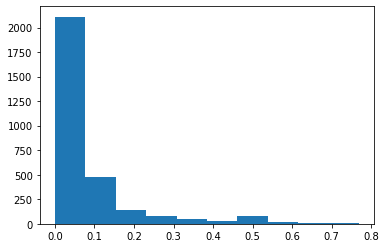

In [ ]:
evaluate_trained_model(model, dev_data)


MSE of the method on the dev set: 0.088985555


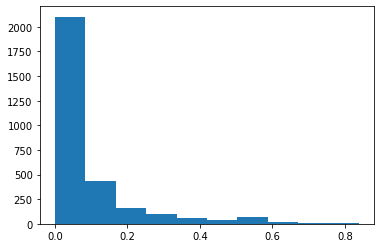

In [ ]:
evaluate_trained_model(model2, dev_data)


MSE of the method on the dev set: 0.10560555


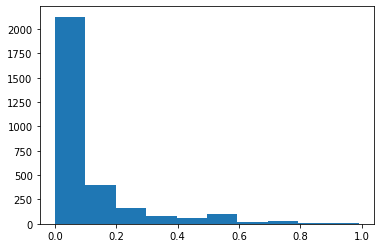

In [ ]:
evaluate_trained_model(model3, dev_data)

## Save trained model
The code below illustrates how to save the trained model. 

In [ ]:
import pickle

info_to_save = {
    'model_state_dict': model.state_dict(),
    'oov_vec': oov_vec
}

with open('best_mlp.state_dict', 'wb') as ff:
    pickle.dump(info_to_save, ff)

## Run and Evaluate Model
The code below creates an instance of the model, loads the saved weights (sample_model.state_dict; run cw2_sample.ipynb will generate this file), and tests it.


MSE of the method on the dev set: 0.07899597


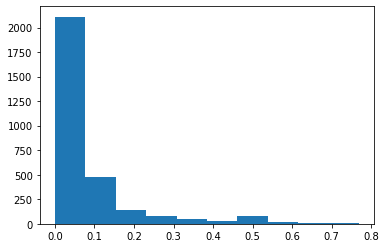

In [ ]:
import pandas as pd

dev_data = pd.read_csv('cw2_dev.csv')


# load the saved file
with open('best_mlp.state_dict','rb') as ff:
    saved_info = pickle.load(ff)

# extract the information from the saved file
oov_vec = saved_info['oov_vec']
saved_model_state = saved_info['model_state_dict']

# create model, load saved weights, and test the model
model = MLP(embd_dim=word_vec_dim)
model.load_state_dict(saved_model_state) 
evaluate_trained_model(model, dev_data)